# Draw inferences from models to build effective strategies

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Get all LSTM models, baselines and backtests for all companies

In [2]:
companies_baselines = pd.read_csv('./COMPANIES_BASELINES.csv')
backtests_returns = pd.read_csv('./BACKTESTS_BASELINES.csv')
alpha_returns = pd.read_csv('./ALPHAS.csv')


## For all companies, for all time periods, find the strategy which performed the best

In [3]:
best_strategy = pd.DataFrame(columns=companies_baselines.columns)

cols = list(companies_baselines.columns)
cols.remove('ticker')

strategy_values = {}
for key in best_strategy.columns:
	strategy_values[key] = []

for ticker in companies_baselines['ticker']:
	# print(ticker)

	strategy_values['ticker'].append(ticker)

	# Get baseline returns
	ticker_baseline = companies_baselines[companies_baselines['ticker'] == ticker]

	# Get backtest returns
	ticker_backtest_returns = backtests_returns[backtests_returns['ticker'] == ticker]

	for col in cols:
		baseline = list(ticker_baseline[col])[0]
		strategy_return = max(list(ticker_backtest_returns[col]))
		strategy_return_index = list(ticker_backtest_returns[col]).index(strategy_return)
		strategy_id = list(ticker_backtest_returns['strategy_type_id'])[strategy_return_index]
		if baseline < strategy_return:
			strategy_values[col].append(strategy_id)
		else:
			strategy_values[col].append(0)
		# print(col, list(ticker_baseline[col])[0], max(list(ticker_backtest_returns[col])))

	# Comment to run for all companies
	# break

for key in strategy_values:
	best_strategy[key] = strategy_values[key]

## Visualization of best strategy across all companies and time periods

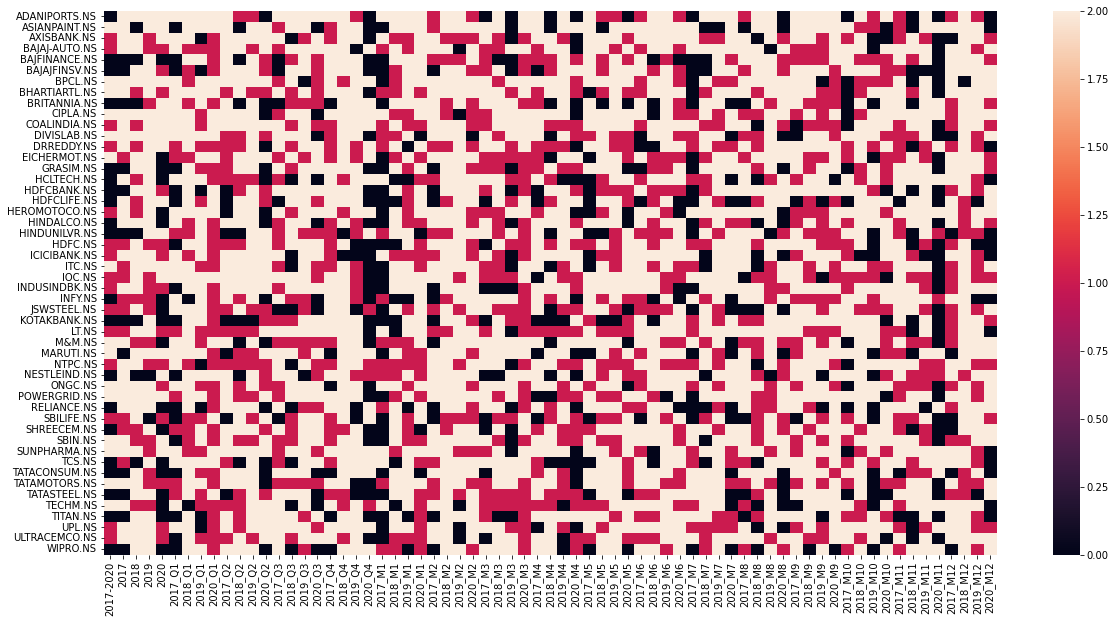

In [4]:
fig = plt.figure(figsize=(20, 10))
y_axis_labels = best_strategy['ticker']
r = sns.heatmap(best_strategy.drop(['ticker'], axis='columns'), yticklabels=y_axis_labels, vmin=0, vmax=2)


- Black - baseline
- Maroon - Strategy 1
- Pink - Strategy 2

## Visualize baselines vs Custom strategies performance across Nifty 50 

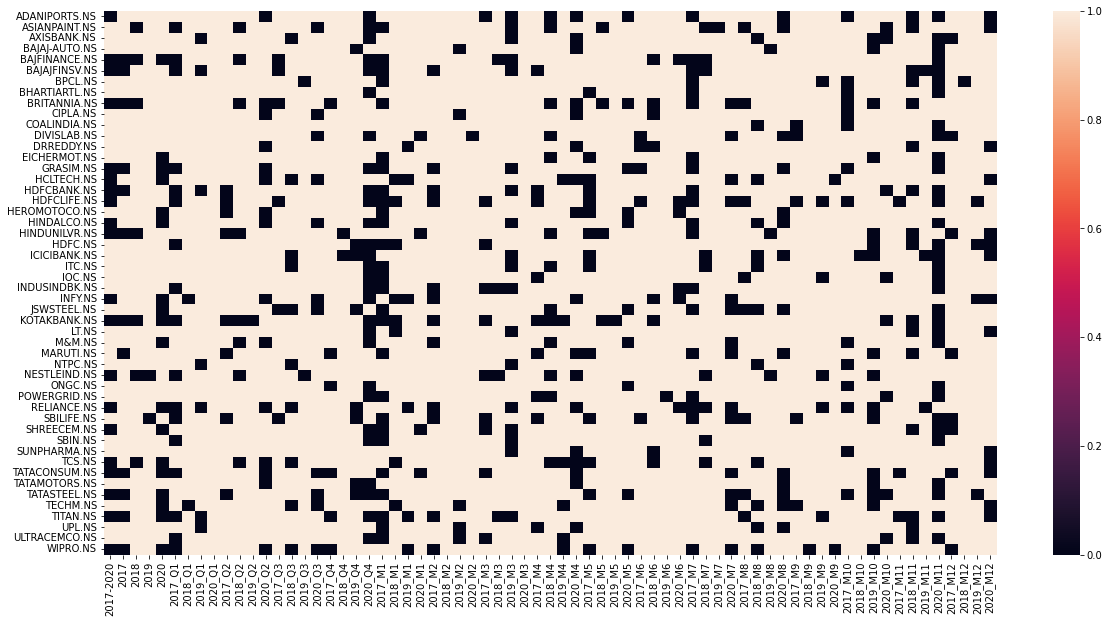

In [5]:
# In which time periods did baselines outperform custom strategies
fig = plt.figure(figsize=(20, 10))
y_axis_labels = best_strategy['ticker']
r = sns.heatmap(best_strategy.drop(['ticker'], axis='columns'), yticklabels=y_axis_labels, vmin=0, vmax=1)

- Black = Baseline
- Peach = Custom strategies

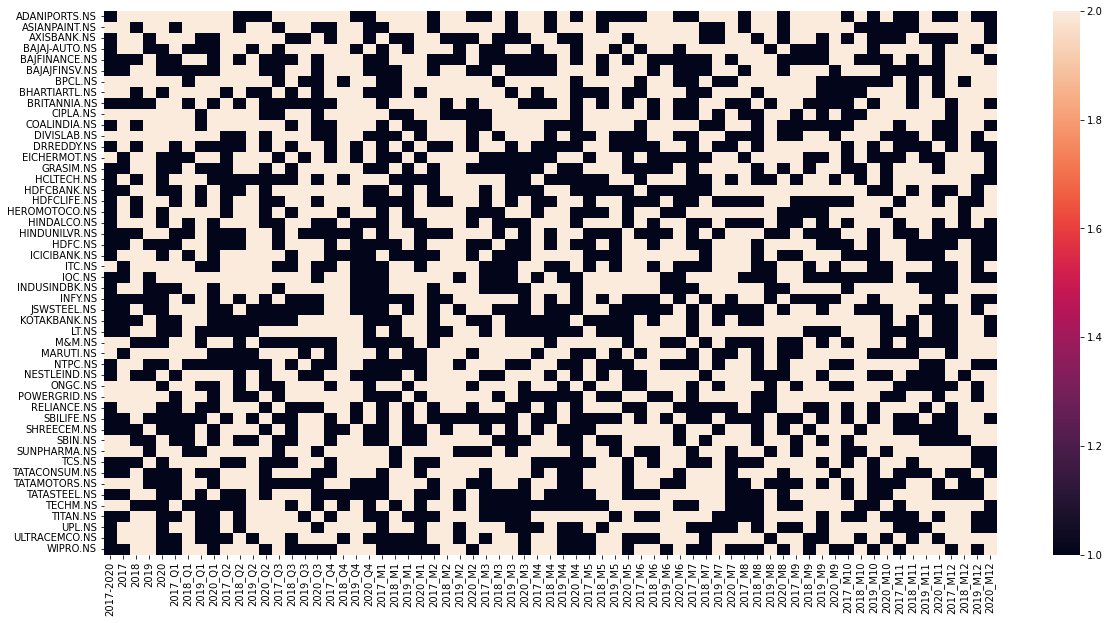

In [6]:
# Conversely, when did LSTM strategies outperform all other strategies
fig = plt.figure(figsize=(20, 10))
y_axis_labels = best_strategy['ticker']
r = sns.heatmap(best_strategy.drop(['ticker'], axis='columns'), yticklabels=y_axis_labels, vmin=1, vmax=2)

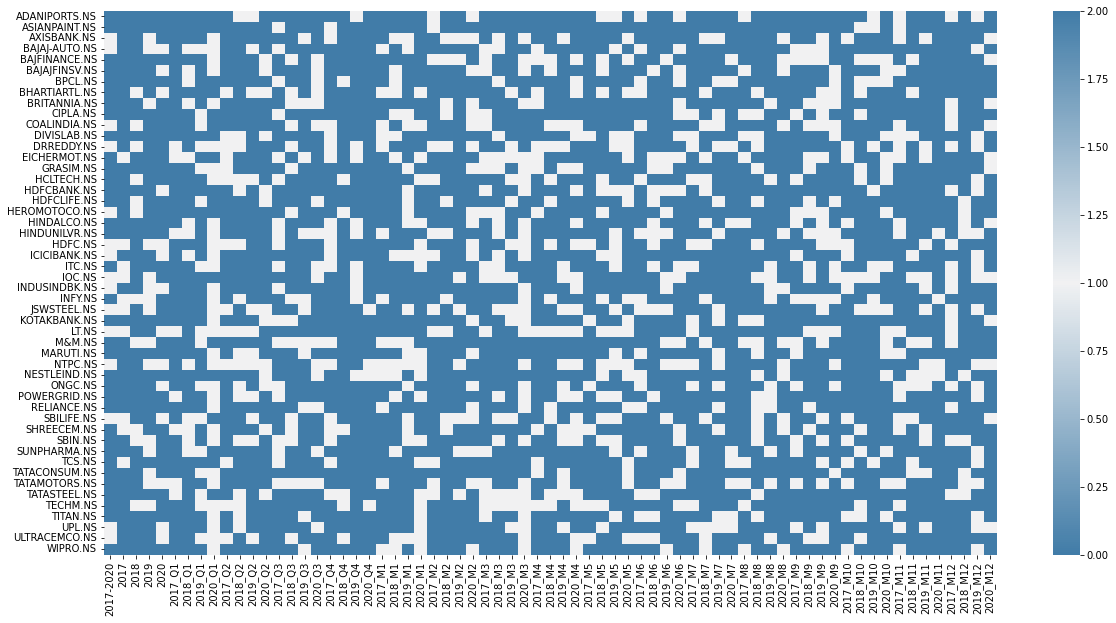

In [7]:
# Also, when did bollinger bands outperform all other strategies
fig = plt.figure(figsize=(20, 10))
bollinger_band_cmap = sns.diverging_palette(240,240, as_cmap=True)
y_axis_labels = best_strategy['ticker']
r = sns.heatmap(best_strategy.drop(['ticker'], axis='columns'), yticklabels=y_axis_labels, cmap=bollinger_band_cmap, vmin=0, vmax=2)


## How did to overall portfolio perform? Create a best performance portfolio

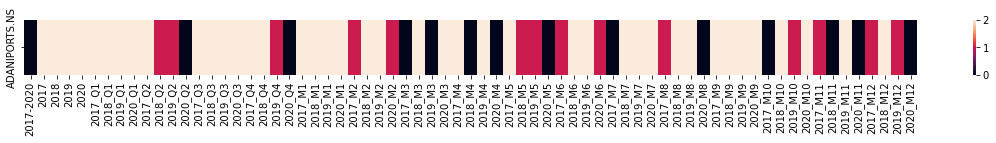

In [8]:
# Adani ports
fig = plt.figure(figsize=(20, 1))
y_axis_labels = best_strategy['ticker'][0]
r = sns.heatmap(best_strategy[best_strategy['ticker'] == 'ADANIPORTS.NS'].drop(['ticker'], axis='columns'), yticklabels=[y_axis_labels], vmin=0, vmax=2)

## Heatmaps with strategy configs

In [9]:
backtests_returns['strategy_config_id'] = [item for sublist in [[i for i in range(1, 41)]*50] for item in sublist]
backtests_returns

,ticker,strategy_type_id,strategy_config_id,backtest_id,2017-2020,2017,2018,2019,2020,2017_Q1,...,2019_M10,2020_M10,2017_M11,2018_M11,2019_M11,2020_M11,2017_M12,2018_M12,2019_M12,2020_M12
0,ADANIPORTS.NS,1,1,1,14.38,16.39,-11.32,16.00,-4.47,22.50,...,0.53,13.46,-6.58,-19.48,-4.95,-11.86,-4.82,17.42,9.15,-0.65
1,ADANIPORTS.NS,1,2,2,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ADANIPORTS.NS,1,3,3,-16.22,14.57,-10.43,114.66,-61.97,23.56,...,4.77,4.95,-11.84,-18.99,2.71,-26.27,6.86,12.49,7.27,-10.70
3,ADANIPORTS.NS,1,4,4,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ADANIPORTS.NS,1,5,5,32.68,8.77,-9.18,45.68,-7.80,18.90,...,-2.07,17.69,-9.53,-25.49,-7.29,-17.45,-10.40,18.82,16.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,WIPRO.NS,2,36,1996,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1996,WIPRO.NS,2,37,1997,-45.92,-13.42,4.13,-19.26,-25.71,-6.69,...,-3.65,-4.37,2.23,3.50,-5.79,-1.52,-3.72,6.85,0.00,0.00
1997,WIPRO.NS,2,38,1998,-90.52,-49.37,55.45,-45.51,-77.89,-2.44,...,-7.06,15.55,-2.50,20.60,1.86,-3.87,-19.59,12.72,-4.59,-2.75
1998,WIPRO.NS,2,39,1999,-85.95,-45.17,60.97,-40.45,-73.26,-6.49,...,-3.91,5.01,4.19,16.25,-4.81,-12.47,-10.85,16.03,3.51,0.00


In [10]:
best_strategy = pd.DataFrame(columns=companies_baselines.columns)

cols = list(companies_baselines.columns)
cols.remove('ticker')

strategy_values = {}
for key in best_strategy.columns:
	strategy_values[key] = []

for ticker in companies_baselines['ticker']:
	# print(ticker)

	strategy_values['ticker'].append(ticker)

	# Get baseline returns
	ticker_baseline = companies_baselines[companies_baselines['ticker'] == ticker]

	# Get backtest returns
	ticker_backtest_returns = backtests_returns[backtests_returns['ticker'] == ticker]

	for col in cols:
		baseline = list(ticker_baseline[col])[0]
		strategy_return = max(list(ticker_backtest_returns[col]))
		strategy_return_index = list(ticker_backtest_returns[col]).index(strategy_return)
		strategy_id = list(ticker_backtest_returns['strategy_config_id'])[strategy_return_index]
		if baseline < strategy_return:
			strategy_values[col].append(strategy_id)
		else:
			strategy_values[col].append(0)
		# print(col, list(ticker_baseline[col])[0], max(list(ticker_backtest_returns[col])))

	# Comment to run for all companies
	# break

for key in strategy_values:
	best_strategy[key] = strategy_values[key]

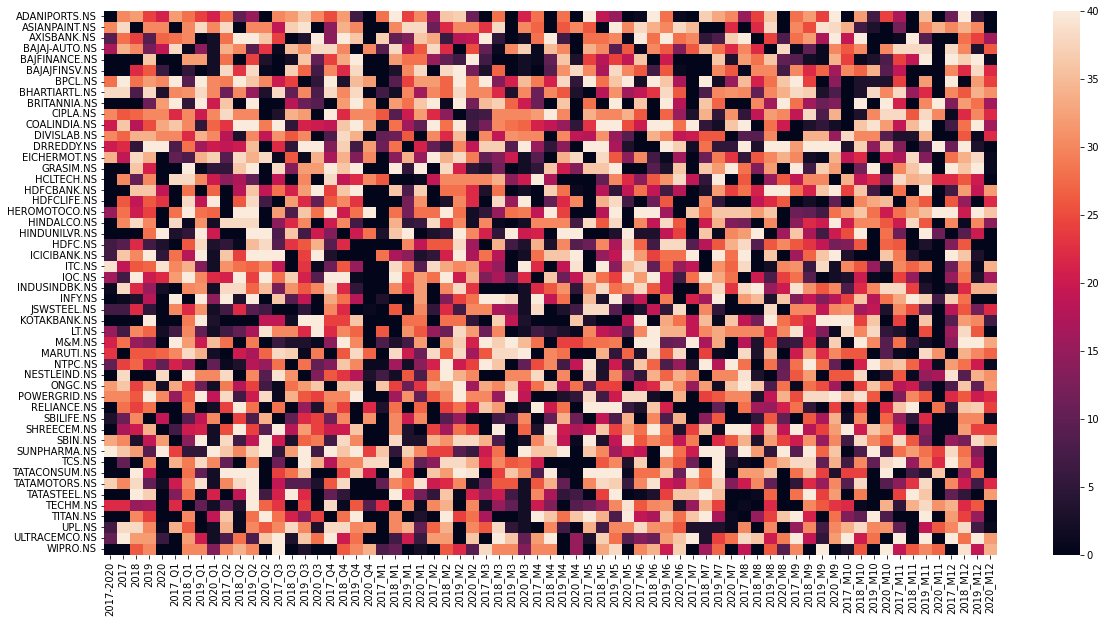

In [11]:
fig = plt.figure(figsize=(20, 10))
y_axis_labels = best_strategy['ticker']
r = sns.heatmap(best_strategy.drop(['ticker'], axis='columns'), yticklabels=y_axis_labels, vmin=0, vmax=40)


In [12]:
# Also, when did bollinger bands outperform all other strategies
fig = plt.figure(figsize=(20, 10))
bollinger_band_cmap = sns.diverging_palette(240,240, as_cmap=True)
y_axis_labels = best_strategy['ticker']


<Figure size 1440x720 with 0 Axes>

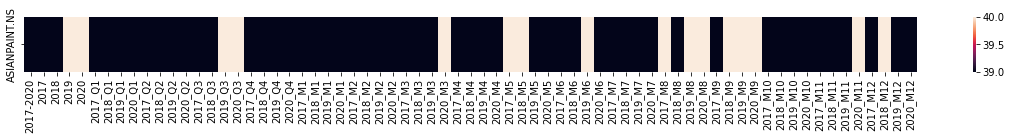

In [13]:
# Adani ports
fig = plt.figure(figsize=(20, 1))
y_axis_labels = best_strategy['ticker'][1]
r = sns.heatmap(best_strategy[best_strategy['ticker'] == 'DRREDDY.NS'].drop(['ticker'], axis='columns'), yticklabels=[y_axis_labels], vmin=39, vmax=40)

## Heatmaps with more generalized strategy configs

In [14]:
# backtests_returns
backtests_returns['strategy_config_id'] = [item for sublist in [
	([i for i in range(1, 21)] + [21 for i in range(4)] + [22 for i in range(4)] + [23 for i in range(4)] + [24 for i in range(4)] + [25 for i in range(4)])*50
	] 
	for item in sublist]



In [15]:
best_strategy = pd.DataFrame(columns=companies_baselines.columns)

cols = list(companies_baselines.columns)
cols.remove('ticker')

strategy_values = {}
for key in best_strategy.columns:
	strategy_values[key] = []

for ticker in companies_baselines['ticker']:
	# print(ticker)

	strategy_values['ticker'].append(ticker)

	# Get baseline returns
	ticker_baseline = companies_baselines[companies_baselines['ticker'] == ticker]

	# Get backtest returns
	ticker_backtest_returns = backtests_returns[backtests_returns['ticker'] == ticker]

	for col in cols:
		baseline = list(ticker_baseline[col])[0]
		strategy_return = max(list(ticker_backtest_returns[col]))
		strategy_return_index = list(ticker_backtest_returns[col]).index(strategy_return)
		strategy_id = list(ticker_backtest_returns['strategy_config_id'])[strategy_return_index]
		if baseline < strategy_return:
			strategy_values[col].append(strategy_id)
		else:
			strategy_values[col].append(0)
		# print(col, list(ticker_baseline[col])[0], max(list(ticker_backtest_returns[col])))

	# Comment to run for all companies
	# break

for key in strategy_values:
	best_strategy[key] = strategy_values[key]

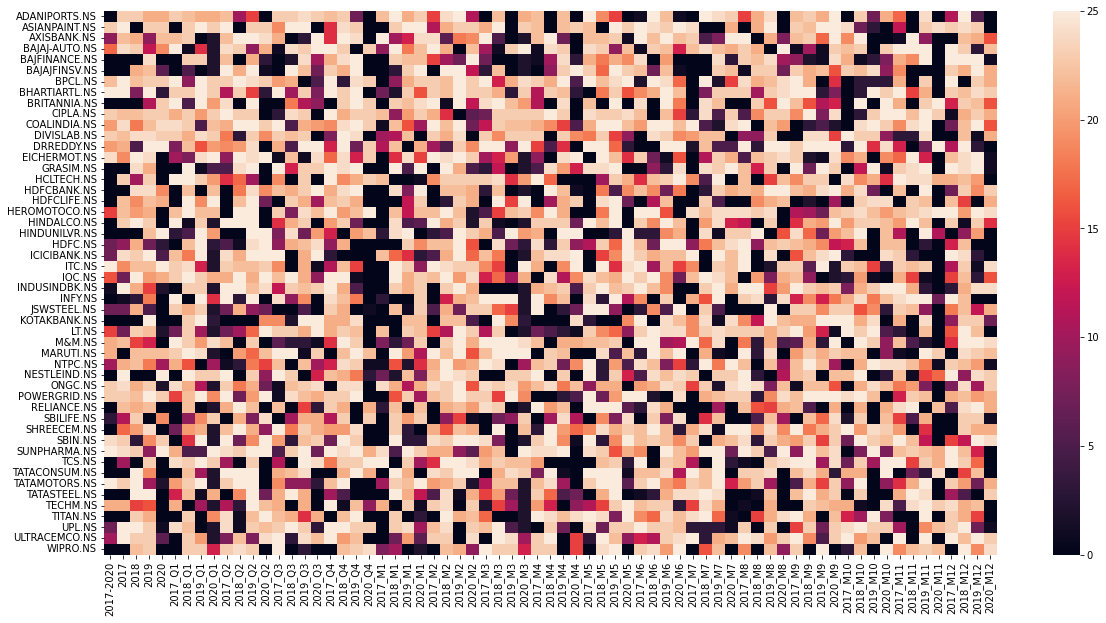

In [17]:
fig = plt.figure(figsize=(20, 10))
y_axis_labels = best_strategy['ticker']
r = sns.heatmap(best_strategy.drop(['ticker'], axis='columns'), yticklabels=y_axis_labels, vmin=0, vmax=25)


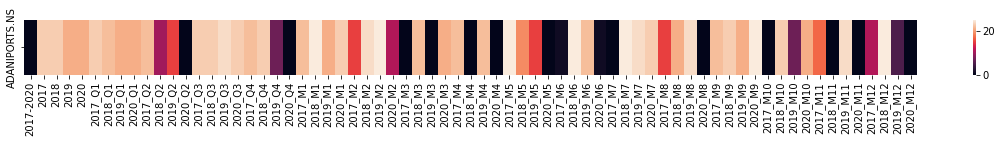

In [18]:
# Adani ports
fig = plt.figure(figsize=(20, 1))
y_axis_labels = best_strategy['ticker'][0]
r = sns.heatmap(best_strategy[best_strategy['ticker'] == 'ADANIPORTS.NS'].drop(['ticker'], axis='columns'), yticklabels=[y_axis_labels], vmin=0, vmax=25)
